## Connect Google Drive to Colab Notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepare Data

### Define path to Dataset File

In [2]:
fer2013_dataset_file_path = '/content/drive/MyDrive/AI Class/2023-1/fer2013_dataset/fer2013.csv'

### Read Dataset and split on Train / Val / Test sets

In [3]:
import csv
import numpy as np
from tqdm import tqdm

In [4]:
train_images, train_labels = [], []
val_images, val_labels = [], []
test_images, test_labels = [], []

with open(fer2013_dataset_file_path) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row_id, row in enumerate(tqdm(csv_reader)):
    if row_id == 0:
      continue

    label_index = row[0]
    image_data = row[1]
    split = row[2]

    # make label vector
    label = np.zeros(7)
    label[int(label_index)] = 1

    # make image vector
    image = list(map(int, image_data.split(' ')))

    if split == 'Training':
      train_labels.append(label)
      train_images.append(image)
    elif split == 'PublicTest':
      test_labels.append(label)
      test_images.append(image)
    elif split == 'PrivateTest':
      val_labels.append(label)
      val_images.append(image)

35888it [00:23, 1557.77it/s]


### Convert into Numpy Arrays

In [5]:
train_labels = np.asarray(train_labels, dtype=np.float32)
train_images = np.asarray(train_images, dtype=np.float32).reshape(-1, 48, 48, 1)

val_labels = np.asarray(val_labels, dtype=np.float32)
val_images = np.asarray(val_images, dtype=np.float32).reshape(-1, 48, 48, 1)

test_labels = np.asarray(test_labels, dtype=np.float32)
test_images = np.asarray(test_images, dtype=np.float32).reshape(-1, 48, 48, 1)

In [6]:
print('Train images:', train_images.shape)
print('Train labels:', train_labels.shape)

print('Val images:', val_images.shape)
print('Val labels:', val_labels.shape)

print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Train images: (28709, 48, 48, 1)
Train labels: (28709, 7)
Val images: (3589, 48, 48, 1)
Val labels: (3589, 7)
Test images: (3589, 48, 48, 1)
Test labels: (3589, 7)


### Normalize Data

In [7]:
train_images /= 255
val_images /= 255
test_images /= 255

## Explore Data

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
emotions = {
    0: 'Angry', 
    1: 'Disgust',
    2: 'Fear', 
    3: 'Happy',
    4: 'Sad', 
    5: 'Surprise', 
    6: 'Neutral'
}

Label array: [0. 0. 0. 0. 0. 1. 0.] 
Label: 5 
Emotion: Surprise 
Image shape: (48, 48, 1)


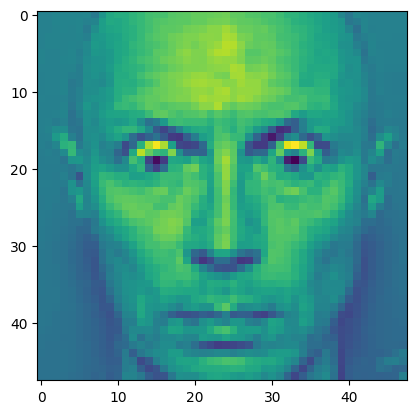

In [10]:
index = 15
print('Label array:', train_labels[index], 
      '\nLabel:', np.argmax(train_labels[index]),
      '\nEmotion:', emotions[np.argmax(train_labels[index])],
      '\nImage shape:', train_images[index].shape)

plt.imshow(train_images[index].reshape(48, 48))
plt.show()

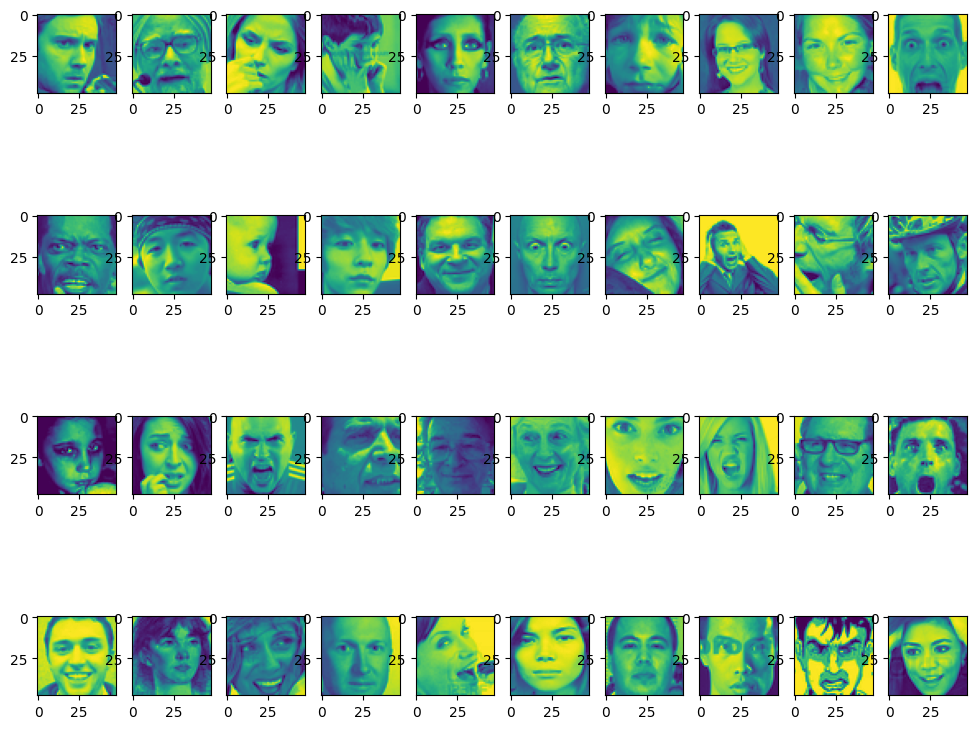

In [11]:
# preview some images

plt.figure(figsize=(12, 10))
x, y = 10, 4

for i in range(40):  
    plt.subplot(y, x, i + 1)
    plt.imshow(train_images[i].reshape((48, 48)))
plt.show()

# Make Model

In [12]:
from tensorflow import keras
from keras import layers

In [13]:
input_shape = (48, 48, 1)


model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(7, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

#### Model Option 2

In [14]:
image_input_shape = (48, 48, 1)

model = keras.models.Sequential()
    
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=image_input_shape))
model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))
    
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
    
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
    
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 23, 23, 128)      

### Model Option 3

In [15]:
input_shape = (48, 48, 1)

kernel_initializer='glorot_uniform'
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(7, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 23, 23, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                      

# Train

### Set Training Parameters

In [16]:
from keras import callbacks

In [17]:
batch_size = 512
epochs = 100

early_stop_callback = callbacks.EarlyStopping(patience=5,
                                              verbose=1,
                                              monitor='val_loss', 
                                              restore_best_weights=True)

reduce_lr_callback = callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.5,
                                                 min_lr=1e-8,
                                                 verbose=1,
                                                 patience=4)

model_path = '/content/drive/MyDrive/AI Class/2023-1/fer2013_models/best_model.h5'
checkpoint_callback = callbacks.ModelCheckpoint(model_path,
                                                monitor='val_accuracy',
                                                verbose=1,
                                                save_freq='epoch',
                                                save_best_only=True, patience=4)


model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.05),
              metrics=['accuracy'])

### Training the model

In [18]:
history = model.fit(
    train_images, train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
    callbacks=[early_stop_callback, reduce_lr_callback, checkpoint_callback], 
    validation_data=(val_images, val_labels), 
    verbose=1
)

Epoch 1/100
57/57 [==============================] - ETA: 0s - loss: 2.4985 - accuracy: 0.2269
Epoch 1: val_accuracy improved from -inf to 0.11591, saving model to /content/drive/MyDrive/AI Class/2023-1/fer2013_models/best_model.h5
57/57 [==============================] - 97s 2s/step - loss: 2.4985 - accuracy: 0.2269 - val_loss: 5.4555 - val_accuracy: 0.1159 - lr: 0.0500
Epoch 2/100
57/57 [==============================] - ETA: 0s - loss: 1.7789 - accuracy: 0.2648
Epoch 2: val_accuracy improved from 0.11591 to 0.14294, saving model to /content/drive/MyDrive/AI Class/2023-1/fer2013_models/best_model.h5
57/57 [==============================] - 87s 2s/step - loss: 1.7789 - accuracy: 0.2648 - val_loss: 2.1698 - val_accuracy: 0.1429 - lr: 0.0500
Epoch 3/100
57/57 [==============================] - ETA: 0s - loss: 1.7402 - accuracy: 0.2917
Epoch 3: val_accuracy improved from 0.14294 to 0.23572, saving model to /content/drive/MyDrive/AI Class/2023-1/fer2013_models/best_model.h5
57/57 [=======

### Analyze Training Process

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


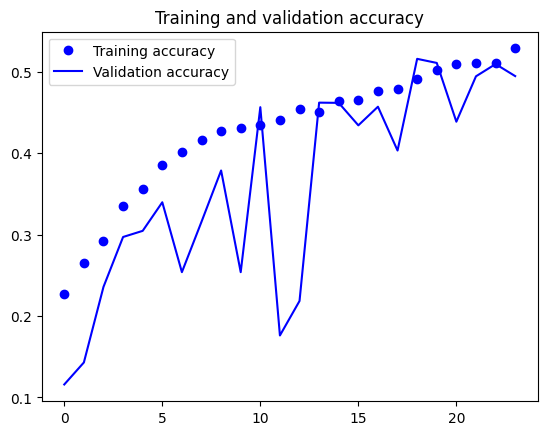

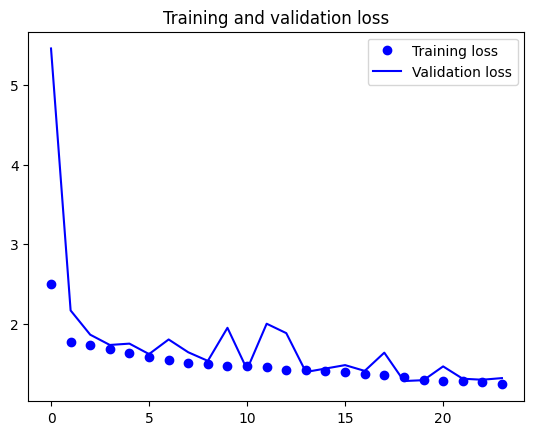

In [19]:
print(history.history.keys())
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(len(train_accuracy))), train_accuracy, 'bo', label='Training accuracy')
plt.plot(list(range(len(val_accuracy))), val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(len(train_loss))), train_loss, 'bo', label='Training loss')
plt.plot(list(range(len(val_loss))), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Test

In [20]:
model = keras.models.load_model(model_path)

In [21]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Loss:', loss, '\nAccuracy:', accuracy * 100, '%')

113/113 [==============================] - 2s 19ms/step - loss: 1.3041 - accuracy: 0.5065
Loss: 1.304101586341858 
Accuracy: 50.654780864715576 %


### Sample Prediction

Image shape: (48, 48, 1)
True Image Label Array: [1. 0. 0. 0. 0. 0. 0.] 
True Image Label Shape: (7,) 
True Image Label: Angry


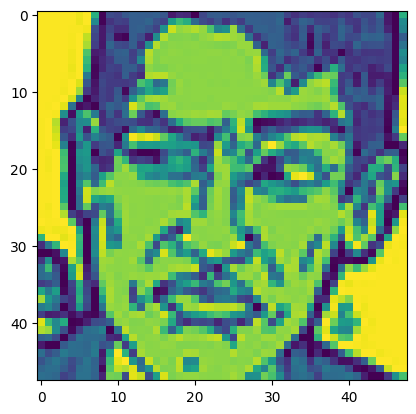

1/1 [==============================] - 0s 228ms/step
Predicted Image Label Array: ['0.08', '0.08', '0.38', '0.09', '0.20', '0.05', '0.12'] 
Predicted Image Label Shape: (1, 7) 
Predicted Image Label: Fear


In [22]:
img_id = 0

sample_test_image = test_images[img_id]
sample_test_label = test_labels[img_id]

print('Image shape:', sample_test_image.shape)
print('True Image Label Array:', sample_test_label, 
      '\nTrue Image Label Shape:', sample_test_label.shape,
      '\nTrue Image Label:', emotions[np.argmax(sample_test_label)])
plt.imshow(sample_test_image.reshape(48, 48))
plt.show()



prediction = model.predict(sample_test_image.reshape(1, 48, 48, 1))

print('Predicted Image Label Array:', ['{0:0.2f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape, 
      '\nPredicted Image Label:', emotions[np.argmax(prediction)])

In [23]:
from sklearn.metrics import confusion_matrix

113/113 [==============================] - 2s 21ms/step


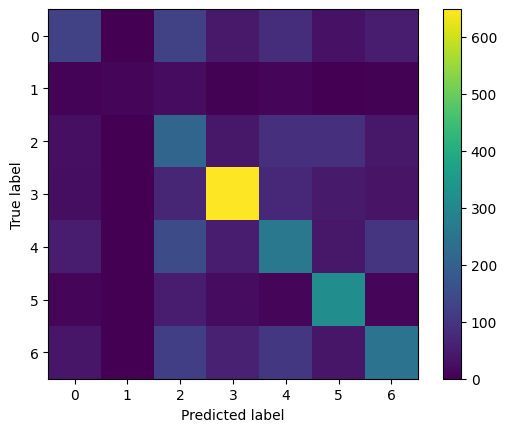

In [24]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.imshow(cm)
plt.colorbar()
plt.xticks(range(7))
plt.yticks(range(7))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()